In [2]:
import sys,glob,datetime,os,gc,importlib,pickle,cftime,re
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from distinctipy import distinctipy
from matplotlib.backends.backend_pdf import PdfPages

import cartopy

import itertools
import warnings
warnings.filterwarnings("ignore")

import _regions_ar6wg1 
import _paths

In [6]:
try:
    %matplotlib inline
    indicator = 'txxETCCDI'
    scenario = 'ssp119'
    realm = 'ETCCDI'
    %load_ext autoreload
    %autoreload 2
except:
    import argparse
    parser = argparse.ArgumentParser(description='look it up')
    parser.add_argument('-i', '--indicator')  
    parser.add_argument('-s', '--scenario')  
    parser.add_argument('-r', '--realm')  
    args = vars(parser.parse_args())
    print(args)
    indicator = args['indicator']   
    scenario = args['scenario']   
    realm = args['realm']   
    
import _regTS_ensemble
import _regions_ar6wg1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
unit_d = dict(tas='K', tasmax='K', tasmin='K', tnnETCCDI='K', txxETCCDI='K', tos='K', pr='mm', rx1dayETCCDI='mm', ua='m/s', va='m/s', abs550aer='?')
unit = unit_d[indicator]

In [10]:
for region_name in _regions_ar6wg1.ar6wg1_reg_info.keys():
    region_name = _regions_ar6wg1.add_land_ocean_flag(region_name)
    print(region_name)
    oo = _regTS_ensemble.regTS_ensemble(region_name=region_name, realm=realm, indicator=indicator, scenario=scenario , esm='*', run='*', 
                                        verbose=False)
    oo._tag_list += ['annual-mean']
    oo.read_data()
    oo.read_data_piControl()
    oo.read_gmt()
    oo.get_timing_of_peak_gmt()
    oo.check_data_usability()
    oo.get_rid_of_uncomplete()
    oo.exclude_models()
    oo.get_models()
    oo._unit = unit
    oo.set_cmap()
    oo.analyse_trend_vs_gmt()
    oo.check_whether_dep_on_gmt_is_significantly_different()
    oo.analyse_lr_vs_nat_var()
    oo.save_object()
    

GIC-land
['/work/uc1275/u290372/overshoot/regional/CMIP6/ETCCDI/txxETCCDI/GIC-land/CMIP6_ETCCDI_txxETCCDI_piControl_CanESM5_r1i1p1f1_GIC-land_annual-mean.nc', '/work/uc1275/u290372/overshoot/regional/CMIP6/ETCCDI/txxETCCDI/GIC-land/CMIP6_ETCCDI_txxETCCDI_piControl_EC-Earth3-Veg-LR_r1i1p1f1_GIC-land_annual-mean.nc', '/work/uc1275/u290372/overshoot/regional/CMIP6/ETCCDI/txxETCCDI/GIC-land/CMIP6_ETCCDI_txxETCCDI_piControl_EC-Earth3_r1i1p1f1_GIC-land_annual-mean.nc', '/work/uc1275/u290372/overshoot/regional/CMIP6/ETCCDI/txxETCCDI/GIC-land/CMIP6_ETCCDI_txxETCCDI_piControl_GFDL-ESM4_r1i1p1f1_GIC-land_annual-mean.nc', '/work/uc1275/u290372/overshoot/regional/CMIP6/ETCCDI/txxETCCDI/GIC-land/CMIP6_ETCCDI_txxETCCDI_piControl_IPSL-CM6A-LR_r1i1p1f1_GIC-land_annual-mean.nc', '/work/uc1275/u290372/overshoot/regional/CMIP6/ETCCDI/txxETCCDI/GIC-land/CMIP6_ETCCDI_txxETCCDI_piControl_MIROC-ES2L_r1i1p1f2_GIC-land_annual-mean.nc', '/work/uc1275/u290372/overshoot/regional/CMIP6/ETCCDI/txxETCCDI/GIC-land/CM

KeyboardInterrupt: 

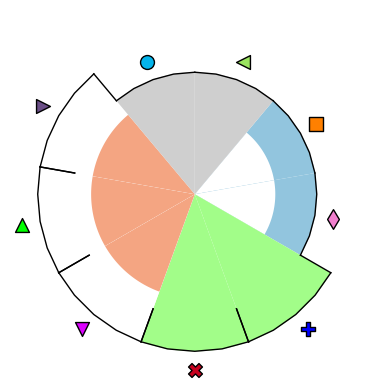

In [9]:
oo.plot_behaviour_pie(markers=True)

In [ ]:
'''
for region_name in _regions_ar6wg1.ar6wg1_reg_info.keys():
    region_name = _regions_ar6wg1.add_land_ocean_flag(region_name)
    print(region_name)
    oo = _regTS_ensemble.regTS_ensemble(region_name=region_name, realm=realm, indicator=indicator, scenario=scenario , esm='*', run='*', unit=unit,
                                        verbose=False)

    oo.load_existing_object()
    oo._unit = unit
    oo.analyse_trend_vs_gmt()
    oo.save_object()
'''